[View in Colaboratory](https://colab.research.google.com/github/krantir904/flightdelay/blob/master/Neural%20Network.ipynb)

In [0]:
  from six.moves import urllib
  import os

  def download_file_from_url(source_url, dest_path):
      # Create directory if not already existed
      path_folder = '/'.join(dest_path.split('/')[:-1])
      if not os.path.exists(path_folder):
          os.mkdir(path_folder)
          print ("Making path_folder: %s" % path_folder)
      urllib.request.urlretrieve(source_url, dest_path)



In [0]:
  iris_data_path  = "/tmp/test"
  iris_data_source_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
  download_file_from_url(iris_data_source_url, iris_data_path)



In [0]:
import tensorflow as tf
IRIS_COLUMNS = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

IRIS_CONTINUOUS_COLUMNS = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

IRIS_LABEL_COLUMN = 'species'

In [0]:
import pandas as pd

def read_csv_with_column(csv_file_path, column_names):
    return pd.read_csv(csv_file_path, names=column_names, skipinitialspace=True)

In [0]:
df_iris_data = read_csv_with_column(iris_data_path, IRIS_COLUMNS)

In [0]:
# Convert categorical data to real values with pandas.Categorical
def convert_categorical_nomial(df, column_name):
    return pd.to_numeric(pd.Categorical.from_array(df[column_name]).codes)

In [21]:

# Convert the caregorical column to int values# Convert 
df_iris_data[IRIS_LABEL_COLUMN] = convert_categorical_nomial(df_iris_data, IRIS_LABEL_COLUMN)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  


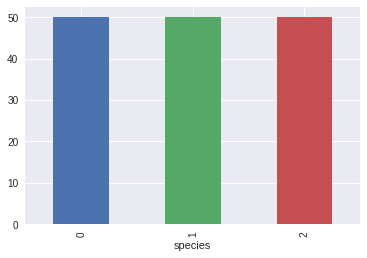

In [22]:

# enable pylab mode in ipython notebook as pylab has been deprecated# enable  
%matplotlib inline
def group_n_plot_by_label(df, label_column):
    df.groupby(label_column).size().plot(kind="bar")
    
group_n_plot_by_label(df_iris_data, IRIS_LABEL_COLUMN)

In [0]:
# Divid data into testing data and 
def split_data(df, sample_rate, random_state=15):
    df_train = df.sample(frac=0.8, random_state=random_state)
    df_test = df.drop(df_train.index)
    return df_train, df_test

# Verify that the train data and test data are evenly sampled
def plot_train_test_data(df_train, df_test, label_column):
    group_n_plot_by_label(df_train, label_column)
    group_n_plot_by_label(df_test, label_column)

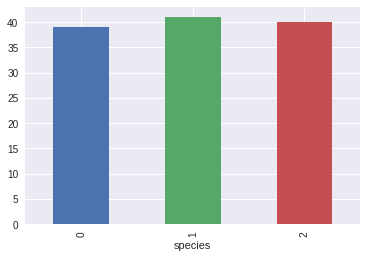

In [24]:
df_iris_train, df_iris_test = split_data(df_iris_data, 0.8)

plot_train_test_data(df_iris_train, df_iris_test, IRIS_LABEL_COLUMN)

In [0]:
def input_fn(df, continuous_columns, label_column):
    feature_cols = {k : tf.constant(df[k].values) for k in continuous_columns}                        
    label = tf.constant(df[label_column].values)
    return feature_cols, label

In [0]:
def iris_train_input_fn():
    return input_fn(df_iris_train, IRIS_CONTINUOUS_COLUMNS, IRIS_LABEL_COLUMN)

def iris_test_input_fn():
    return input_fn(df_iris_test, IRIS_CONTINUOUS_COLUMNS, IRIS_LABEL_COLUMN)

In [0]:

# "sepal_length", "sepal_width", "petal_length", "petal_width"# "sepal_ 
def create_feature_columns(feature_columns_names):
    feature_columns = []
    for feature_name in feature_columns_names:
        feature = tf.contrib.layers.real_valued_column(feature_name)
        feature_columns.append(feature)
    return feature_columns

In [0]:
iris_feature_column = create_feature_columns(IRIS_CONTINUOUS_COLUMNS)

In [30]:
model_dir = "/tmp/workspace/continuous-dnn/"
iris_classifier = tf.contrib.learn.DNNClassifier(feature_columns=iris_feature_column,
                                            hidden_units=[10, 20, 10],
                                            n_classes=3,
                                            model_dir=model_dir)

Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_task_type': None, '_train_distribute': None, '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f6af70f4d10>, '_model_dir': '/tmp/workspace/continuous-dnn/', '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_tf_random_seed': None, '_save_summary_steps': 100, '_device_fn': None, '_num_worker_replicas': 0, '_task_id': 0, '_log_step_count_steps': 100, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_evaluation_master': ''

In [32]:
iris_classifier.fit(input_fn=iris_train_input_fn, steps = 1)

TypeError: ignored

In [33]:
iris_results = classifier.evaluate(input_fn=test_input_fn, steps=1)

NameError: ignored